# Business Understanding
## Overview of the business
A company that is seeking to expand into the aviation industry and wants buy aircrafts for its new division

## Business Problem

Being new in the aviation industry the company is unaware of the potential risks that are associated with aircrafts 

## Business Objectives
The company wants to understand the potential risks it may face in the aviation industry
The company wants to obtain a list of recommended aircrafts that are considered to have low risks in regards to its operational use

## Success Criteria
To obtain a list of aircrafts that are considered to have low risks

To outline the potential risks the company may experience in the aviation industry

To produce relevant visualisations that provide insights on aircraft and the aviation industry

## Project plan

To go through a dataset that contains accidents that have occurred in the aviation industry and to obtain relevant insights that can be able to solve the business problem






# Familization with the dataset

In [1]:
# Importing the pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows=120

Loading the dataset to be used


In [3]:
aviation_data_df = pd.read_csv("data/AviationData.csv", encoding='latin-1', dtype='str')


In [4]:
usstate_codes_df = pd.read_csv("data/USState_Codes.csv")

Checking the head, tail and a sample of the dataset so to get an understanding of the dataset we are working with


In [5]:
aviation_data_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1,Reciprocating,NaN,NaN,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1,Reciprocating,NaN,NaN,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
aviation_data_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0,1,0,0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1,NaN,091,NaN,Personal,NaN,0,0,0,1,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0,0,0,0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0,1,0,1,NaN,NaN,NaN,30-12-2022


In [7]:
aviation_data_df.sample(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
48573,20001212X21248,Accident,IAD00LA050,2000-06-11,"WEST ALEXANDRIA, OH",United States,NaN,NaN,3OH1,MORNINGSTAR AIRPORT,Non-Fatal,Substantial,NaN,N1056G,Bakeng,DOUBLE DEUCE,Yes,1,Reciprocating,NaN,NaN,Personal,NaN,0,2,0,0,VMC,Maneuvering,Probable Cause,04-12-2001
32850,20001211X12462,Accident,MIA93LA131,1993-05-27,"MYAKKA, FL",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N8278M,Cessna,210K,No,1,Reciprocating,NaN,NaN,Personal,NaN,0,0,0,2,VMC,Cruise,Probable Cause,26-09-1994
7920,20001214X39378,Accident,NYC84FA137,1984-04-10,"MARLBORO, NJ",United States,NaN,NaN,2N8,MARLBORO,Fatal(2),Destroyed,NaN,N9950U,Grumman American,AA-1C,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,VMC,Takeoff,Probable Cause,NaN
46031,20001212X18848,Accident,NYC99FA100,1999-05-02,"WESTTOWN, NY",United States,NaN,NaN,NaN,NaN,Fatal(1),Substantial,NaN,N29GS,Stock,S-1S,Yes,1,Reciprocating,NaN,NaN,Personal,NaN,1,0,0,0,VMC,Maneuvering,Probable Cause,03-08-2000
28699,20001212X17731,Accident,SEA91LA197,1991-07-31,"HILLSBORO, OR",United States,NaN,NaN,HIO,HILLSBORO,Non-Fatal,Destroyed,NaN,N9190U,Cessna,150M,No,1,Reciprocating,NaN,NaN,Instructional,NaN,0,0,0,1,VMC,Approach,Probable Cause,13-07-1993
7875,20001214X39360,Accident,MKC84FA116,1984-04-04,"FAYETTEVILLE, AR",United States,NaN,NaN,FYV,DRAKE FIELD,Fatal(2),Destroyed,NaN,N8156M,Cessna,310I,No,2,Reciprocating,NaN,NaN,Business,NaN,2,0,0,0,IMC,Approach,Probable Cause,NaN
54250,20030310X00303,Accident,FTW03LA105,2003-03-06,"ALPINE, TX",United States,30.386666,-103.685833,NaN,NaN,Non-Fatal,Substantial,NaN,N16KH,Aerospatiale,SA341G,No,1,Turbo Shaft,NaN,NSCH,NaN,NaN,NaN,NaN,4,NaN,VMC,Takeoff,Probable Cause,23-07-2003
10702,20001214X35534,Accident,LAX85FA111,1985-01-16,"RIVERSIDE, CA",United States,NaN,NaN,RAL,RIVERSIDE,Non-Fatal,Substantial,NaN,N6020P,Beech,C24R,No,1,Reciprocating,NaN,NSCH,Unknown,NaN,0,0,0,4,VMC,Landing,Probable Cause,NaN
15462,20001213X34142,Accident,DEN86FA213,1986-07-31,"RAWLINS, WY",United States,NaN,NaN,RWL,RAWLINS MUN,Fatal(2),Destroyed,NaN,N85JJ,Thorp,T-18,Yes,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,VMC,Maneuvering,Probable Cause,NaN
40378,20001208X06630,Accident,SEA96LA194,1996-08-18,"MULINO, OR",United States,NaN,NaN,4S9,MULINO,Non-Fatal,Substantial,NaN,N150KS,Piper,PA-20,No,1,Reciprocating,NaN,NaN,Instructional,NaN,0,0,0,1,VMC,Takeoff,Probable Cause,28-02-1997


In [8]:
aviation_data_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
aviation_data_df.shape

(88889, 31)

In [10]:
len(aviation_data_df.columns)

31

In [11]:
usstate_codes_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [12]:
usstate_codes_df.tail()

,US_State,Abbreviation
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO
61,Pacific ocean,PO


In [13]:
usstate_codes_df.shape

(62, 2)

In [14]:
usstate_codes_df.columns

Index(['US_State', 'Abbreviation'], dtype='object')

# DATA UNDERSTANDING



The data folder contains two data sets

## Aviation dataset
This dataset contains data of reported aviation accidents and information regarding the accident reported.

The dataset contains 31 columns with each column containing information on the accident reported.

Some of the columns in the dataset include:date of the accident, the severity of the accident, country where the accident occurred, aircraft damage, aircraft type and model etc

The dataset contains 88889 records

## US State Codes dataset
This dataset contains information on the full name of abbreviated us state codes

The dataset contains two columns i.e the US state and its abbrevaiation

The dataset contains 62 records





# Data cleaning

## Aviation Dataset

In [15]:
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88889 non-null  object
 1   Investigation.Type      88889 non-null  object
 2   Accident.Number         88889 non-null  object
 3   Event.Date              88889 non-null  object
 4   Location                88837 non-null  object
 5   Country                 88663 non-null  object
 6   Latitude                34382 non-null  object
 7   Longitude               34373 non-null  object
 8   Airport.Code            50249 non-null  object
 9   Airport.Name            52790 non-null  object
 10  Injury.Severity         87889 non-null  object
 11  Aircraft.damage         85695 non-null  object
 12  Aircraft.Category       32287 non-null  object
 13  Registration.Number     87572 non-null  object
 14  Make                    88826 non-null  object
 15  Mo

Using pd.info we can observe the following

a) every column contain string values

b)They are columns with null values

c)Columns names contain different structures and need to be standardized

### Converting column names to a simple standardized form

a)column names to be converted to lower case

b)column names to be seperated by underscore


In [16]:
#converting the columns into lower case
aviation_data_df.columns=aviation_data_df.columns.str.lower()

In [17]:
#seperating column names with an underscore rather than with a period

aviation_data_df.columns=aviation_data_df.columns.str.replace('.','_')

aviation_data_df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [18]:
aviation_data_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1,Reciprocating,NaN,NaN,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1,Reciprocating,NaN,NaN,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16-04-1980


### Converting columns that contain string values to respective dtypes

This columns were all converted to string values while reading the csv so to clear error generated.Therefore we need to go through each column and with intuition convert some of the columns back to their original data type

In [19]:
aviation_data_df.sample(10)

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
29479,20001212X18460,Accident,LAX92FA047,1991-11-20,"DAVIS, CA",United States,NaN,NaN,NaN,NaN,Fatal(3),Destroyed,NaN,N5011K,Bell,206BIII,No,1,Turbo Shaft,NaN,NSCH,Unknown,Aris Helicopter Ltd,3,0,0,0,IMC,Cruise,Probable Cause,23-04-1993
37676,20001207X03891,Accident,CHI95LA216,1995-07-05,"CHESTERFIELD, MO",United States,NaN,NaN,SUS,SPIRIT OF ST. LOUIS,Non-Fatal,Substantial,NaN,N9144T,Piper,PA-28-181,No,1,Reciprocating,NaN,NaN,Instructional,NaN,0,0,0,1,VMC,Landing,Probable Cause,24-09-1995
23112,20001213X28520,Accident,CHI89DEX04,1989-06-02,"SELLERSBURG, IN",United States,NaN,NaN,JVY,CLARK COUNTY,Non-Fatal,Substantial,NaN,N3665F,North American,SNJ-5,No,1,Reciprocating,NaN,NaN,Personal,NaN,0,1,1,0,VMC,Takeoff,Probable Cause,30-06-1992
71932,20120613X32908,Accident,CEN12WA365,2012-06-08,"Caserio Las Msareas, Guatemala",Guatemala,143713N,0092915W,NaN,NaN,Fatal,Destroyed,Airplane,TG-KOD,Piper Pawnee,PA25-260,No,1,NaN,NUSN,NaN,Aerial Application,Not Provided,1,0,0,0,NaN,NaN,NaN,25-09-2020
2943,20020917X04582,Accident,DEN83LTI01,1982-10-02,"MANHATTAN, MT",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Helicopter,N133RW,Scorpion,133,Yes,1,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0,0,0,1,VMC,Cruise,Probable Cause,02-10-1983
59884,20051215X01977,Accident,DFW06CA032,2005-11-21,"ANAHUAC, TX",United States,29.768611,-94.657222,T00,Chambers County Airport,Non-Fatal,Substantial,Airplane,N15145,Piper,PA-34-200,No,2,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,NaN,NaN,NaN,2,VMC,Landing,Probable Cause,28-02-2006
43726,20001211X09936,Accident,NYC98FA095,1998-04-19,"BRIDGEPORT, CT",United States,NaN,NaN,BDR,IGOR I. SIKORSKY MEMORIAL,Fatal(1),Destroyed,NaN,N40HL,Mooney,M20J,No,1,Reciprocating,NaN,NaN,Personal,NaN,1,0,0,0,IMC,Go-around,Probable Cause,21-06-2000
49145,20001212X21748,Accident,IAD00LA077,2000-08-19,"DOYLESTOWN, PA",United States,NaN,NaN,DYL,DOYLESTOWN AIRPORT,Non-Fatal,Substantial,NaN,N82716,Foulke,EUROPA TRI-GEAR,Yes,1,Reciprocating,NaN,NaN,Personal,NaN,0,0,0,2,VMC,Landing,Probable Cause,19-09-2001
56589,20040505X00560,Accident,FTW04LA105,2004-05-02,"LAKE DALLAS, TX",United States,33.131945,-97.014167,30F,Lakeview Airport,Non-Fatal,Substantial,NaN,N60539,Cessna,150J,No,1,Reciprocating,NaN,NaN,Personal,NaN,NaN,NaN,NaN,2,VMC,Takeoff,Probable Cause,29-07-2004
80004,20170604X50503,Accident,WPR17LA119,2017-06-03,"Garfield, WA",United States,465929N,0117738W,NaN,NaN,Non-Fatal,Substantial,Airplane,N255BZ,PAUL R SEIPT,SONEX,Yes,1,Reciprocating,091,NaN,Personal,SEIPT PAUL R,0,0,0,1,VMC,NaN,The pilots improper torque of screws that att...,05-05-2021


#### number_of_engines,total_fatal_injuries,total_minor_injuries,total_serious_injuries and total_uninjured to interger values
Taking a sample of the dataset we can safely deduce that the following columns originally contained interger values

number_of_engines,total_fatal_injuries,total_minor_injuries,total_serious_injuries and total_uninjured

In [20]:
#We first convert the columns above to numeric
aviation_data_df['number_of_engines'] = pd.to_numeric(aviation_data_df['number_of_engines'],errors= 'coerce')
aviation_data_df['total_fatal_injuries'] = pd.to_numeric(aviation_data_df['total_fatal_injuries'], errors = 'coerce')
aviation_data_df['total_serious_injuries'] = pd.to_numeric(aviation_data_df['total_serious_injuries'], errors = 'coerce')
aviation_data_df['total_minor_injuries'] = pd.to_numeric(aviation_data_df['total_minor_injuries'], errors = 'coerce')
aviation_data_df['total_uninjured'] = pd.to_numeric(aviation_data_df['total_uninjured'], errors = 'coerce')


In [21]:

aviation_data_df[['number_of_engines','total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured']]=aviation_data_df[['number_of_engines','total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured']].astype('Int32')

In [22]:
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                88889 non-null  object
 1   investigation_type      88889 non-null  object
 2   accident_number         88889 non-null  object
 3   event_date              88889 non-null  object
 4   location                88837 non-null  object
 5   country                 88663 non-null  object
 6   latitude                34382 non-null  object
 7   longitude               34373 non-null  object
 8   airport_code            50249 non-null  object
 9   airport_name            52790 non-null  object
 10  injury_severity         87889 non-null  object
 11  aircraft_damage         85695 non-null  object
 12  aircraft_category       32287 non-null  object
 13  registration_number     87572 non-null  object
 14  make                    88826 non-null  object
 15  mo

In [23]:
aviation_data_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1,Reciprocating,NaN,NaN,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1,Reciprocating,NaN,NaN,Personal,NaN,3,<NA>,<NA>,<NA>,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,<NA>,NaN,NaN,NaN,Personal,NaN,1,2,<NA>,0,VMC,Approach,Probable Cause,16-04-1980


In [24]:
#Ensuring all data that are in string notation are stripped and title_cased
aviation_data_df=aviation_data_df.applymap(lambda x:x.strip() if isinstance(x,str)else x)
aviation_data_df=aviation_data_df.applymap(lambda x:x.title() if isinstance(x,str)else x)

#### converting event_date and publication_date to pandas.Datetime

In [25]:
#Converting columns that contain dates into pandas.datetime
# that is event_date and publication_date


aviation_data_df['event_date']=pd.to_datetime(aviation_data_df['event_date'],format="%Y-%m-%d" ,yearfirst= True, errors= 'coerce')



In [26]:
aviation_data_df['publication_date']=pd.to_datetime(aviation_data_df['publication_date'],format="%d-%m-%Y", yearfirst= True, errors='coerce')

In [27]:
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                88889 non-null  object        
 1   investigation_type      88889 non-null  object        
 2   accident_number         88889 non-null  object        
 3   event_date              88889 non-null  datetime64[ns]
 4   location                88837 non-null  object        
 5   country                 88663 non-null  object        
 6   latitude                34382 non-null  object        
 7   longitude               34373 non-null  object        
 8   airport_code            50249 non-null  object        
 9   airport_name            52790 non-null  object        
 10  injury_severity         87889 non-null  object        
 11  aircraft_damage         85695 non-null  object        
 12  aircraft_category       32287 non-null  object

In [28]:
aviation_data_df[['event_date','publication_date']].sample(20)

,event_date,publication_date
9536,1984-08-25,NaT
53101,2002-07-21,2003-07-23
22485,1989-03-06,1990-05-22
10341,1984-11-21,NaT
46950,1999-08-24,2001-01-18
778,1982-04-06,1983-04-06
64925,2008-07-13,2020-09-25
59925,2005-12-06,2006-01-11
80564,2017-09-03,2020-09-25
69582,2011-02-25,2020-09-25


In [29]:
#It might be useful to extract the years and the months of the event_date
aviation_data_df['event_year'] = aviation_data_df['event_date'].dt.year
aviation_data_df['event_month'] = aviation_data_df['event_date'].dt.month_name()


In [30]:
aviation_data_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,event_year,event_month
0,20001218X45444,Accident,Sea87La080,1948-10-24,"Moose Creek, Id",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,Nc6404,Stinson,108-3,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,Unk,Cruise,Probable Cause,NaT,1948,October
1,20001218X45447,Accident,Lax94La336,1962-07-19,"Bridgeport, Ca",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,Pa24-180,No,1,Reciprocating,NaN,NaN,Personal,NaN,4,0,0,0,Unk,Unknown,Probable Cause,1996-09-19,1962,July
2,20061025X01555,Accident,Nyc07La005,1974-08-30,"Saltville, Va",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1,Reciprocating,NaN,NaN,Personal,NaN,3,<NA>,<NA>,<NA>,Imc,Cruise,Probable Cause,2007-02-26,1974,August
3,20001218X45448,Accident,Lax96La321,1977-06-19,"Eureka, Ca",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,Imc,Cruise,Probable Cause,2000-09-12,1977,June
4,20041105X01764,Accident,Chi79Fa064,1979-08-02,"Canton, Oh",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15Ny,Cessna,501,No,<NA>,NaN,NaN,NaN,Personal,NaN,1,2,<NA>,0,Vmc,Approach,Probable Cause,1980-04-16,1979,August


In [31]:
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                88889 non-null  object        
 1   investigation_type      88889 non-null  object        
 2   accident_number         88889 non-null  object        
 3   event_date              88889 non-null  datetime64[ns]
 4   location                88837 non-null  object        
 5   country                 88663 non-null  object        
 6   latitude                34382 non-null  object        
 7   longitude               34373 non-null  object        
 8   airport_code            50249 non-null  object        
 9   airport_name            52790 non-null  object        
 10  injury_severity         87889 non-null  object        
 11  aircraft_damage         85695 non-null  object        
 12  aircraft_category       32287 non-null  object

In [32]:
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                88889 non-null  object        
 1   investigation_type      88889 non-null  object        
 2   accident_number         88889 non-null  object        
 3   event_date              88889 non-null  datetime64[ns]
 4   location                88837 non-null  object        
 5   country                 88663 non-null  object        
 6   latitude                34382 non-null  object        
 7   longitude               34373 non-null  object        
 8   airport_code            50249 non-null  object        
 9   airport_name            52790 non-null  object        
 10  injury_severity         87889 non-null  object        
 11  aircraft_damage         85695 non-null  object        
 12  aircraft_category       32287 non-null  object

In [33]:
#Let us reorder our new created columns to be closer to their referenced column
column_names=aviation_data_df.columns.to_list()
column_names

['event_id',
 'investigation_type',
 'accident_number',
 'event_date',
 'location',
 'country',
 'latitude',
 'longitude',
 'airport_code',
 'airport_name',
 'injury_severity',
 'aircraft_damage',
 'aircraft_category',
 'registration_number',
 'make',
 'model',
 'amateur_built',
 'number_of_engines',
 'engine_type',
 'far_description',
 'schedule',
 'purpose_of_flight',
 'air_carrier',
 'total_fatal_injuries',
 'total_serious_injuries',
 'total_minor_injuries',
 'total_uninjured',
 'weather_condition',
 'broad_phase_of_flight',
 'report_status',
 'publication_date',
 'event_year',
 'event_month']

In [34]:
reorderd_columns=['event_id',
 'investigation_type',
 'accident_number',
 'event_date',
 'event_year',
 'event_month',
 'location',
 'country',
 'latitude',
 'longitude',
 'airport_code',
 'airport_name',
 'injury_severity',
 'aircraft_damage',
 'aircraft_category',
 'registration_number',
 'make',
 'model',
 'amateur_built',
 'number_of_engines',
 'engine_type',
 'far_description',
 'schedule',
 'purpose_of_flight',
 'air_carrier',
 'total_fatal_injuries',
 'total_serious_injuries',
 'total_minor_injuries',
 'total_uninjured',
 'weather_condition',
 'broad_phase_of_flight',
 'report_status',
 'publication_date']

In [35]:
aviation_data_df=aviation_data_df[reorderd_columns]

In [36]:
aviation_data_df.head()

,event_id,investigation_type,accident_number,event_date,event_year,event_month,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,Sea87La080,1948-10-24,1948,October,"Moose Creek, Id",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,Nc6404,Stinson,108-3,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,Unk,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,Lax94La336,1962-07-19,1962,July,"Bridgeport, Ca",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,Pa24-180,No,1,Reciprocating,NaN,NaN,Personal,NaN,4,0,0,0,Unk,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,Nyc07La005,1974-08-30,1974,August,"Saltville, Va",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1,Reciprocating,NaN,NaN,Personal,NaN,3,<NA>,<NA>,<NA>,Imc,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,Lax96La321,1977-06-19,1977,June,"Eureka, Ca",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,Imc,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,Chi79Fa064,1979-08-02,1979,August,"Canton, Oh",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15Ny,Cessna,501,No,<NA>,NaN,NaN,NaN,Personal,NaN,1,2,<NA>,0,Vmc,Approach,Probable Cause,1980-04-16


#### Location,Country,Latitudes and longitude

In [37]:
aviation_data_df[['location','country','latitude','longitude']].sample(30)

,location,country,latitude,longitude
77165,"Wolcottville, In",United States,041326N,0852231W
76777,"Taylorville, Il",United States,039321N,0891925W
76011,"Bullhead City, Az",United States,035921N,1143334W
9478,"Pine Grove Mill, Pa",United States,NaN,NaN
26346,"Bieber, Ca",United States,NaN,NaN
61572,"Alava, Spain",Spain,NaN,NaN
54725,"Orangeburg, Sc",United States,33.456389,-80.855278
57817,"Paint Lick, Ky",United States,37.618611,-84.363611
45111,"Dunkirk, Ny",United States,NaN,NaN
63995,"Mccullough, Al",United States,031100N,0873130W


In [38]:
# The other dataset contains the full abreviations of some of those states
usstate_codes_df

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [39]:
#We need to create a dictionary which the we can use to rename some of the abbreviations in the loaction column
state_dict= dict(zip(usstate_codes_df['Abbreviation'],usstate_codes_df['US_State']))
state_dict

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming',
 'AS': 'American Samoa',
 'G

In [40]:
#Lets replace the abbreviated state names with full names in the location column
aviation_data_df['location'] = aviation_data_df['location'].replace(state_dict,regex=True)


In [41]:
#Lets convert the locations into title cases
aviation_data_df['location'] = aviation_data_df['location'].str.title()
aviation_data_df.sample(20)

,event_id,investigation_type,accident_number,event_date,event_year,event_month,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
88714,20221026106201,Incident,Dca23Wa033,2022-10-24,2022,October,"Canberra,",American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vh-Veq,Saab,340,No,<NA>,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaT
11926,20001214X36759,Accident,Den85La165,1985-06-13,1985,June,"Clearfield, Ut",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N7259P,Piper,Pa-24-250,No,1,Reciprocating,NaN,NaN,Unknown,NaN,0,0,0,3,Vmc,Go-Around,Probable Cause,NaT
58490,20050518X00629,Accident,Chi05La099,2005-04-18,2005,April,"Jackson, Mi",United States,42.259722,-84.459444,Jxn,Jackson County Airport,Non-Fatal,Substantial,NaN,N1082D,Cessna,195A,No,1,Reciprocating,NaN,NaN,Instructional,NaN,<NA>,<NA>,<NA>,2,Vmc,Landing,Probable Cause,2006-05-30
52704,20020606X00825,Accident,Nyc02La108,2002-06-02,2002,June,"Littlestown, Pa",United States,39.726945,-77.111944,76W,Kingsdale Air Park,Non-Fatal,Substantial,NaN,N2555G,Cessna,182B,No,1,Reciprocating,NaN,NaN,Other Work Use,NaN,<NA>,<NA>,<NA>,1,Vmc,Landing,Probable Cause,2002-10-23
78001,20160325X80001,Accident,Wpr16Fa087,2016-03-23,2016,March,"Astoria, Or",United States,046138N,1234748W,NaN,NaN,Fatal,Destroyed,Airplane,N7055D,North American,At 6A,No,1,Reciprocating,091,NaN,Personal,NaN,2,0,0,0,Vmc,NaN,The Pilot'S Loss Of Aircraft Control During A ...,2020-09-25
33315,20001211X13009,Accident,Sea93La158,1993-07-23,1993,July,"Troutdale, Or",United States,NaN,NaN,Ttd,Portland Troutdale,Non-Fatal,Substantial,NaN,N30170,Cessna,177,No,1,Reciprocating,NaN,NaN,Personal,NaN,0,1,3,0,Vmc,Approach,Probable Cause,1994-08-01
29600,20001212X18641,Accident,Mia92La047,1991-12-13,1991,December,"Hollywood, Fl",United States,NaN,NaN,Hwo,North Perry,Non-Fatal,Substantial,NaN,N3767V,Cessna,150M,No,1,Reciprocating,NaN,NaN,Personal,NaN,0,0,0,1,Vmc,Takeoff,Probable Cause,1993-04-27
68297,20100617X11958,Incident,Eng10Wa036,2010-06-11,2010,June,"Tokyo, Japan, Japan",Japan,NaN,NaN,Nrt,Narita/New Tokyo International,NaN,NaN,Airplane,Ja01Kz,Boeing,747-481F,No,4,Turbo Fan,Nusc,Schd,NaN,Nippon Cargo Airlines,0,0,0,0,NaN,NaN,NaN,2020-11-03
12490,20001214X37109,Accident,Den85La205,1985-07-30,1985,July,"Evanston, Wy",United States,NaN,NaN,Evw,Evanston,Non-Fatal,Destroyed,NaN,N9455D,Cessna,172Rg,No,1,Reciprocating,NaN,NaN,Personal,NaN,0,0,0,2,Vmc,Landing,Probable Cause,NaT
60369,20060511X00559,Accident,Lax06Ca138,2006-03-26,2006,March,"Paso Robles, Ca",United States,35.672778,-120.626945,Prb,Paso Robles Municipal Airport,Non-Fatal,Substantial,Airplane,N5906W,Piper,Pa-28-180,No,1,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,<NA>,<NA>,<NA>,3,Vmc,Landing,Probable Cause,2006-08-29


### Injury severity

In [42]:
## Injury Severity

aviation_data_df[['injury_severity','total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured']]

## The injury severity explain the classification of the accident. It therefore needs to have a standardized values so to provide accurate information

,injury_severity,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
0,Fatal(2),2,0,0,0
1,Fatal(4),4,0,0,0
2,Fatal(3),3,<NA>,<NA>,<NA>
3,Fatal(2),2,0,0,0
4,Fatal(1),1,2,<NA>,0
...,...,...,...,...,...
88884,Minor,0,1,0,0
88885,NaN,0,0,0,0
88886,Non-Fatal,0,0,0,1
88887,NaN,0,0,0,0


In [43]:
#Lets link column names that are related to the injury severity column
injury_severity_columns=['total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured']

In [44]:
aviation_data_df[injury_severity_columns].isna()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
0,False,False,False,False
1,False,False,False,False
2,False,True,True,True
3,False,False,False,False
4,False,False,True,False
...,...,...,...,...
88884,False,False,False,False
88885,False,False,False,False
88886,False,False,False,False
88887,False,False,False,False


In [45]:
aviation_data_df[['injury_severity','total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured']].isna().sum()


injury_severity            1000
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
dtype: int64

In [46]:
# Lets fill the values where there might be null values with zero
aviation_data_df[injury_severity_columns]=aviation_data_df.loc[:,(injury_severity_columns)].fillna(0)

In [47]:
aviation_data_df[['injury_severity','total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured']].isna().sum()

injury_severity           1000
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
dtype: int64

In [48]:
aviation_data_df.shape

(88889, 33)

In [49]:
#Lets deal with instances where the value 0 exists all through the four columns and drop those rows

aviation_data_df=aviation_data_df[~(aviation_data_df[injury_severity_columns] == 0).all(axis=1)]

In [50]:
aviation_data_df.shape

(87580, 33)

In [51]:
## Checking unique values 
aviation_data_df['injury_severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Fatal(135)', 'Fatal(31)', 'Fatal(256)',
       'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)', 'Fatal(18)',
       'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)', 'Fatal(174)',
       'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)', 'Fatal(27)',
       'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)', 'Fatal(47)',
       'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)', 'Fatal(54)',
       'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)', 'Fatal(189)',
       'Fatal(123)', 'Fatal(33)', 'Fatal(110)', 'Fatal(230)', 'Fatal(97)',
       'Fatal(349)', 'Fatal(125)', 'Fatal(35)', 'Fatal(228)', 'Fatal(75)',
       'Fatal(104)', 'Fatal(229)', 'Fatal(80)', 'Fatal(2

I would like to introduce a standardized naming

a)fatal = if total_fatal_injuries>0

b)serious = if total_fatal_injury== 0 and total_serious_injury >0

c)minor =if total_fatal_injury== 0 and total_serious_injury == 0 and total_minor_injury >0

d)no_injuries = else

In [52]:
aviation_data_df[aviation_data_df["total_minor_injuries"]> 0]

,event_id,investigation_type,accident_number,event_date,event_year,event_month,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
5,20170710X52551,Accident,Nyc79Aa106,1979-09-17,1979,September,"Boston, Ma",United States,42.445277,-70.758333,NaN,NaN,Non-Fatal,Substantial,Airplane,Cf-Tlu,Mcdonnell Douglas,Dc9,No,2,Turbo Fan,Part 129: Foreign,Schd,NaN,Air Canada,0,0,1,44,Vmc,Climb,Probable Cause,2017-09-19
9,20020909X01560,Accident,Mia82Da029,1982-01-01,1982,January,"Jacksonville, Fl",United States,NaN,NaN,Jax,Jacksonville Intl,Non-Fatal,Substantial,NaN,N3906K,North American,Navion L-17B,No,1,Reciprocating,NaN,NaN,Personal,NaN,0,0,3,0,Imc,Cruise,Probable Cause,1982-01-01
12,20020917X02148,Accident,Ftw82Frj07,1982-01-02,1982,January,"Homer, La",United States,NaN,NaN,NaN,NaN,Non-Fatal,Destroyed,Airplane,N14779,Bellanca,17-30A,No,1,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0,0,1,0,Imc,Cruise,Probable Cause,1983-01-02
28,20020917X02340,Accident,Mia82Da030,1982-01-03,1982,January,"Cocoa, Fl",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,N94252,Cessna,210L,No,1,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0,0,1,1,Vmc,Descent,Probable Cause,1983-01-03
29,20020917X02155,Accident,Lax82Da035,1982-01-03,1982,January,"San Clementine, Ca",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,N8630V,Bellanca,7Gcbc,No,1,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0,0,2,0,Vmc,Maneuvering,Probable Cause,1983-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88838,20221203106405,Accident,Era23Fa077,2022-12-02,2022,December,"Falmouth, Ma",United States,413516N,0703211W,5B6,Falmouth Airpark,Fatal,Substantial,Airplane,N3515H,Mooney,M20J,No,1,NaN,091,NaN,Personal,Oldham Candace J,1,0,1,0,Vmc,NaN,NaN,2022-12-20
88855,20221212106439,Accident,Dca23La093,2022-12-08,2022,December,"Newark, Nj",United States,NaN,NaN,NaN,NaN,Serious,NaN,NaN,N649Ua,Boeing,767-322,No,<NA>,NaN,121,Schd,NaN,NaN,0,3,1,175,NaN,NaN,NaN,2022-12-12
88866,20221213106448,Accident,Cen23La062,2022-12-12,2022,December,"Carrollton, Tx",United States,NaN,NaN,NaN,NaN,Serious,NaN,NaN,N231Gz,Mooney Aircraft Corp.,M20K,No,<NA>,NaN,091,Nsch,Personal,Wright Wiley Singleton,0,0,2,0,NaN,NaN,NaN,2022-12-15
88872,20221214106459,Accident,Gaa23Wa042,2022-12-14,2022,December,"Happy Valley-Goose Bay, Of",Canada,NaN,NaN,NaN,NaN,Serious,NaN,NaN,N5Eq,Piper,Pa 46-350P,No,<NA>,NaN,NaN,NaN,NaN,NaN,0,0,2,0,NaN,NaN,NaN,2022-12-20


In [53]:
def injury_severity(fatal,serious,minor,uninjured):
    severity_type = None

    if fatal > 0:
        severity_type = "fatal"
    elif serious > 0:
        severity_type="serious"
    elif minor > 0:
        severity_type="minor"
    else:
        severity_type="no_injuries"
    
    return severity_type
    

In [54]:
aviation_data_df['injury_severity']= aviation_data_df.apply(lambda row:injury_severity(fatal=row['total_fatal_injuries'],serious=row['total_serious_injuries'],minor=row['total_minor_injuries'],uninjured=row['total_uninjured']),axis= 1)

In [55]:
aviation_data_df.iloc[28]

event_id                             20020917X02340
investigation_type                         Accident
accident_number                          Mia82Da030
event_date                      1982-01-03 00:00:00
event_year                                     1982
event_month                                 January
location                                  Cocoa, Fl
country                               United States
latitude                                        NaN
longitude                                       NaN
airport_code                                    NaN
airport_name                                    NaN
injury_severity                               minor
aircraft_damage                         Substantial
aircraft_category                          Airplane
registration_number                          N94252
make                                         Cessna
model                                          210L
amateur_built                                    No
number_of_en

In [56]:
aviation_data_df['injury_severity'].unique()

array(['fatal', 'minor', 'no_injuries', 'serious'], dtype=object)

### make,model

In [57]:
a={}
for i in aviation_data_df.columns:
    a[i]=len(aviation_data_df[i].unique())

unique_values_0= pd.DataFrame(list(a.items()), columns=['Column', 'unique_val'])
unique_values_0["missing_values"]= aviation_data_df.isna().sum().values
unique_values_0

,Column,unique_val,missing_values
0,event_id,86653,0
1,investigation_type,2,0
2,accident_number,87564,0
3,event_date,14753,0
4,event_year,47,0
5,event_month,12,0
6,location,21426,42
7,country,208,222
8,latitude,25399,53473
9,longitude,26941,53482


In [58]:
aviation_data_df['make'].sample(30)

7091                             Cessna
28402                            Hiller
65078                           Osborne
74493                            Cessna
85729                          Robinson
33647                             Beech
85168                      Cub Crafters
49997                            Mooney
88848                     Orlican S R O
66087                             Howes
72046                             Piper
83605                            Cessna
57704                            Cessna
74219                     Sweet Wayne A
61361                            Cessna
86484    Grumman Acft Eng Cor-Schweizer
21889                            Boeing
19848                            Cessna
37742                            Cessna
56926                             Beech
1864                              Piper
64726                            Cessna
16995                             Piper
46229                             Beech
45902                            Harris


In [59]:
aviation_data_df['make']= aviation_data_df['make'].str.replace('-', " ")
aviation_data_df['model']= aviation_data_df['model'].str.replace('-', " ")

## Missing values

Lets check for columns that have a lot of missing values and also rows

In [60]:
aviation_data_df.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
event_year                    0
event_month                   0
location                     42
country                     222
latitude                  53473
longitude                 53482
airport_code              37589
airport_name              35067
injury_severity               0
aircraft_damage            2590
aircraft_category         56294
registration_number        1102
make                         40
model                        64
amateur_built                65
number_of_engines          5146
engine_type                6102
far_description           56475
schedule                  75645
purpose_of_flight          5070
air_carrier               71502
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition          3406
broad_phase_of_flight     25870
report_s

In [61]:
aviation_data_df.isna().mean()
#lets drop columns that have mean missing values >0.6

event_id                  0.000000
investigation_type        0.000000
accident_number           0.000000
event_date                0.000000
event_year                0.000000
event_month               0.000000
location                  0.000480
country                   0.002535
latitude                  0.610562
longitude                 0.610665
airport_code              0.429196
airport_name              0.400400
injury_severity           0.000000
aircraft_damage           0.029573
aircraft_category         0.642772
registration_number       0.012583
make                      0.000457
model                     0.000731
amateur_built             0.000742
number_of_engines         0.058758
engine_type               0.069673
far_description           0.644839
schedule                  0.863725
purpose_of_flight         0.057890
air_carrier               0.816419
total_fatal_injuries      0.000000
total_serious_injuries    0.000000
total_minor_injuries      0.000000
total_uninjured     

In [62]:
aviation_data_df.shape

(87580, 33)

In [63]:
#lets drop columns that have mean missing values >0.4
column_means=aviation_data_df.isna().mean()
drop_columns=[i for i in aviation_data_df.columns if column_means[i]>0.4]

aviation_data_df.drop(columns=drop_columns,inplace=True)
aviation_data_df.shape


(87580, 25)

In [64]:
a={}
for i in aviation_data_df.columns:
    a[i]=len(aviation_data_df[i].unique())

unique_values_0= pd.DataFrame(list(a.items()), columns=['Column', 'unique_val'])
unique_values_0["missing_values"]= aviation_data_df.isna().sum().values
unique_values_0

,Column,unique_val,missing_values
0,event_id,86653,0
1,investigation_type,2,0
2,accident_number,87564,0
3,event_date,14753,0
4,event_year,47,0
5,event_month,12,0
6,location,21426,42
7,country,208,222
8,injury_severity,4,0
9,aircraft_damage,5,2590


In [65]:
aviation_data_df

,event_id,investigation_type,accident_number,event_date,event_year,event_month,location,country,injury_severity,aircraft_damage,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,Sea87La080,1948-10-24,1948,October,"Moose Creek, Id",United States,fatal,Destroyed,Nc6404,Stinson,108 3,No,1,Reciprocating,Personal,2,0,0,0,Unk,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,Lax94La336,1962-07-19,1962,July,"Bridgeport, Ca",United States,fatal,Destroyed,N5069P,Piper,Pa24 180,No,1,Reciprocating,Personal,4,0,0,0,Unk,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,Nyc07La005,1974-08-30,1974,August,"Saltville, Va",United States,fatal,Destroyed,N5142R,Cessna,172M,No,1,Reciprocating,Personal,3,0,0,0,Imc,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,Lax96La321,1977-06-19,1977,June,"Eureka, Ca",United States,fatal,Destroyed,N1168J,Rockwell,112,No,1,Reciprocating,Personal,2,0,0,0,Imc,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,Chi79Fa064,1979-08-02,1979,August,"Canton, Oh",United States,fatal,Destroyed,N15Ny,Cessna,501,No,<NA>,NaN,Personal,1,2,0,0,Vmc,Approach,Probable Cause,1980-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88882,20221222106486,Accident,Cen23La068,2022-12-21,2022,December,"Reserve, La",United States,serious,NaN,N321Gd,Grumman American Avn. Corp.,Aa 5B,No,<NA>,NaN,Instructional,0,1,0,1,NaN,NaN,NaN,2022-12-27
88883,20221228106502,Accident,Gaa23Wa046,2022-12-22,2022,December,"Brasnorte,",Brazil,fatal,NaN,Pp-Irc,Air Tractor,At502,No,<NA>,NaN,NaN,1,0,0,0,NaN,NaN,NaN,2022-12-28
88884,20221227106491,Accident,Era23La093,2022-12-26,2022,December,"Annapolis, Md",United States,serious,NaN,N1867H,Piper,Pa 28 151,No,<NA>,NaN,Personal,0,1,0,0,NaN,NaN,NaN,2022-12-29
88886,20221227106497,Accident,Wpr23La075,2022-12-26,2022,December,"Payson, Az",United States,no_injuries,Substantial,N749Pj,American Champion Aircraft,8Gcbc,No,1,NaN,Personal,0,0,0,1,Vmc,NaN,NaN,2022-12-27


In [66]:
d={}
for i in aviation_data_df.columns:
    d[i]=len(aviation_data_df[i].unique())

unique_values= pd.DataFrame(list(d.items()), columns=['Column', 'unique_val'])
unique_values["missing_values"]= aviation_data_df.isna().sum().values
unique_values


,Column,unique_val,missing_values
0,event_id,86653,0
1,investigation_type,2,0
2,accident_number,87564,0
3,event_date,14753,0
4,event_year,47,0
5,event_month,12,0
6,location,21426,42
7,country,208,222
8,injury_severity,4,0
9,aircraft_damage,5,2590


lets drop rows that have a lot of missing values

To figure which rows to drop we first figure out the most important columns that we dont want any null values
For me they are

make,model,weather_condition


In [67]:
aviation_data_df.dropna(axis= 0 ,subset=(['make','model','weather_condition']), inplace= True)

In [68]:
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84121 entries, 0 to 88886
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                84121 non-null  object        
 1   investigation_type      84121 non-null  object        
 2   accident_number         84121 non-null  object        
 3   event_date              84121 non-null  datetime64[ns]
 4   event_year              84121 non-null  int64         
 5   event_month             84121 non-null  object        
 6   location                84080 non-null  object        
 7   country                 83901 non-null  object        
 8   injury_severity         84121 non-null  object        
 9   aircraft_damage         82144 non-null  object        
 10  registration_number     83289 non-null  object        
 11  make                    84121 non-null  object        
 12  model                   84121 non-null  object

In [69]:
e={}
for i in aviation_data_df.columns:
    e[i]=len(aviation_data_df[i].unique())

unique_values_1= pd.DataFrame(list(e.items()), columns=['Column', 'unique_val'])
unique_values_1["missing_values"]= aviation_data_df.isna().sum().values
unique_values_1

,Column,unique_val,missing_values
0,event_id,83205,0
1,investigation_type,2,0
2,accident_number,84107,0
3,event_date,14625,0
4,event_year,47,0
5,event_month,12,0
6,location,19269,41
7,country,182,220
8,injury_severity,4,0
9,aircraft_damage,5,1977


In [70]:
aviation_data_df.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
event_year                    0
event_month                   0
location                     41
country                     220
injury_severity               0
aircraft_damage            1977
registration_number         832
make                          0
model                         0
amateur_built                41
number_of_engines          3053
engine_type                3438
purpose_of_flight          2762
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight     22503
report_status              2598
publication_date          12833
dtype: int64

# Visualisations

In [71]:
cleaned_aviation_data_df = aviation_data_df.copy()

In [72]:
cleaned_aviation_data_df.head()

,event_id,investigation_type,accident_number,event_date,event_year,event_month,location,country,injury_severity,aircraft_damage,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,Sea87La080,1948-10-24,1948,October,"Moose Creek, Id",United States,fatal,Destroyed,Nc6404,Stinson,108 3,No,1,Reciprocating,Personal,2,0,0,0,Unk,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,Lax94La336,1962-07-19,1962,July,"Bridgeport, Ca",United States,fatal,Destroyed,N5069P,Piper,Pa24 180,No,1,Reciprocating,Personal,4,0,0,0,Unk,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,Nyc07La005,1974-08-30,1974,August,"Saltville, Va",United States,fatal,Destroyed,N5142R,Cessna,172M,No,1,Reciprocating,Personal,3,0,0,0,Imc,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,Lax96La321,1977-06-19,1977,June,"Eureka, Ca",United States,fatal,Destroyed,N1168J,Rockwell,112,No,1,Reciprocating,Personal,2,0,0,0,Imc,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,Chi79Fa064,1979-08-02,1979,August,"Canton, Oh",United States,fatal,Destroyed,N15Ny,Cessna,501,No,<NA>,NaN,Personal,1,2,0,0,Vmc,Approach,Probable Cause,1980-04-16


## Line graph showing the the progress of number of accidents through the years

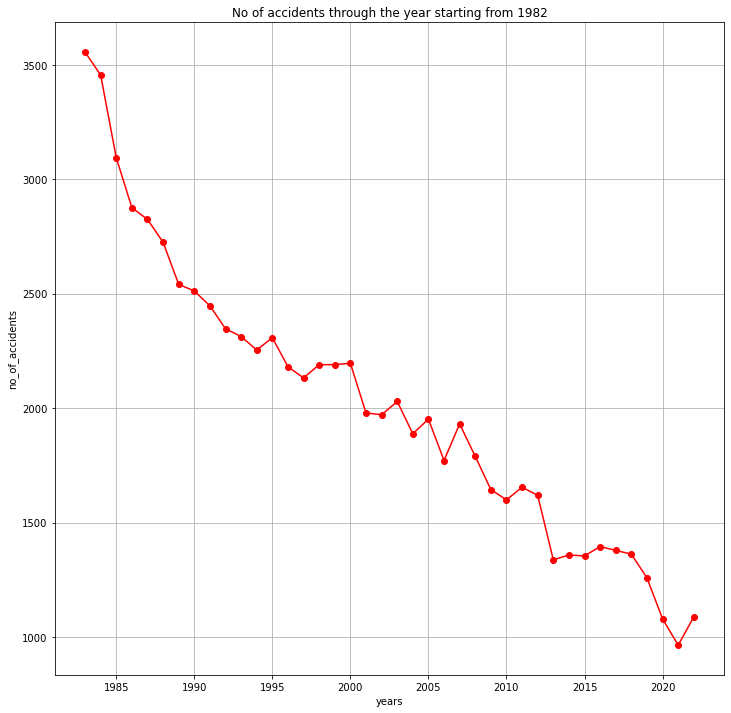

In [73]:
#create a dictionary of the no of count of accidents in each year
years_and_number_of_accidents=dict(cleaned_aviation_data_df['event_year'].value_counts())

sorted_years_and_number_of_accidents_keys= sorted(years_and_number_of_accidents)
#sort the keys of the dictionaries
sorted_years_and_number_of_accidents={key:years_and_number_of_accidents[key] for key in sorted_years_and_number_of_accidents_keys if key>1982}

fig,ax=plt.subplots(figsize=(12,12))
ax.plot(sorted_years_and_number_of_accidents.keys(),sorted_years_and_number_of_accidents.values(),color='red',marker="o",)
ax.set(xlabel='years',ylabel="no_of_accidents",title='No of accidents through the year starting from 1982')
ax.grid()

plt.show();


## Figure showing the distribution of severity of accidents

<ipython-input-74-8d38c3372567>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dist_of_injuries=cleaned_aviation_data_df.groupby('injury_severity')['total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured'].sum()


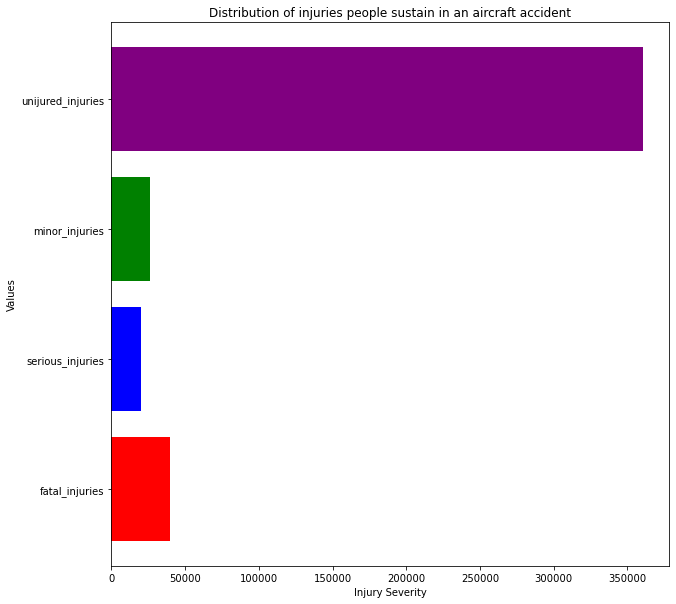

In [74]:
#Create a dataframe grouping event_year to the no of people affected by each type of accidents
dist_of_injuries=cleaned_aviation_data_df.groupby('injury_severity')['total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured'].sum()
dist_of_injuries=dist_of_injuries.reset_index()
dist_of_injuries.drop(columns='injury_severity',inplace=True)

#Create a dictionary to store the sum of the injuries
injury_data={
    "fatal_injuries":sum(dist_of_injuries['total_fatal_injuries']),
    "serious_injuries":sum(dist_of_injuries['total_serious_injuries']),
    "minor_injuries":sum(dist_of_injuries['total_minor_injuries']),
    "unijured_injuries":sum(dist_of_injuries['total_uninjured'])
}
injury_type=list(injury_data.keys())
injury_values=list(injury_data.values())

fig,ax=plt.subplots(figsize=(10,10))

ax.barh(injury_type,injury_values,color=['red','blue','green','purple'])
plt.title('Distribution of injuries people sustain in an aircraft accident')
plt.xlabel('Injury Severity')
plt.ylabel('Values')
plt.show();





## figure showing no of accidents that led to various injuries and also the number of people from various accidents


In [75]:
#group the no of people injured by year
dist_of_injuries_1=cleaned_aviation_data_df.groupby('event_year')['total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured'].sum()

<ipython-input-75-70cb86a95ccb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dist_of_injuries_1=cleaned_aviation_data_df.groupby('event_year')['total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured'].sum()


In [76]:
dist_of_injuries_1=dist_of_injuries_1.loc[1982:]

In [77]:
#Creating a new column of no of people affected by the year
dist_of_injuries_1['people_affected']=dist_of_injuries_1['total_fatal_injuries']+dist_of_injuries_1['total_serious_injuries']+dist_of_injuries_1['total_minor_injuries']+dist_of_injuries_1['total_uninjured']

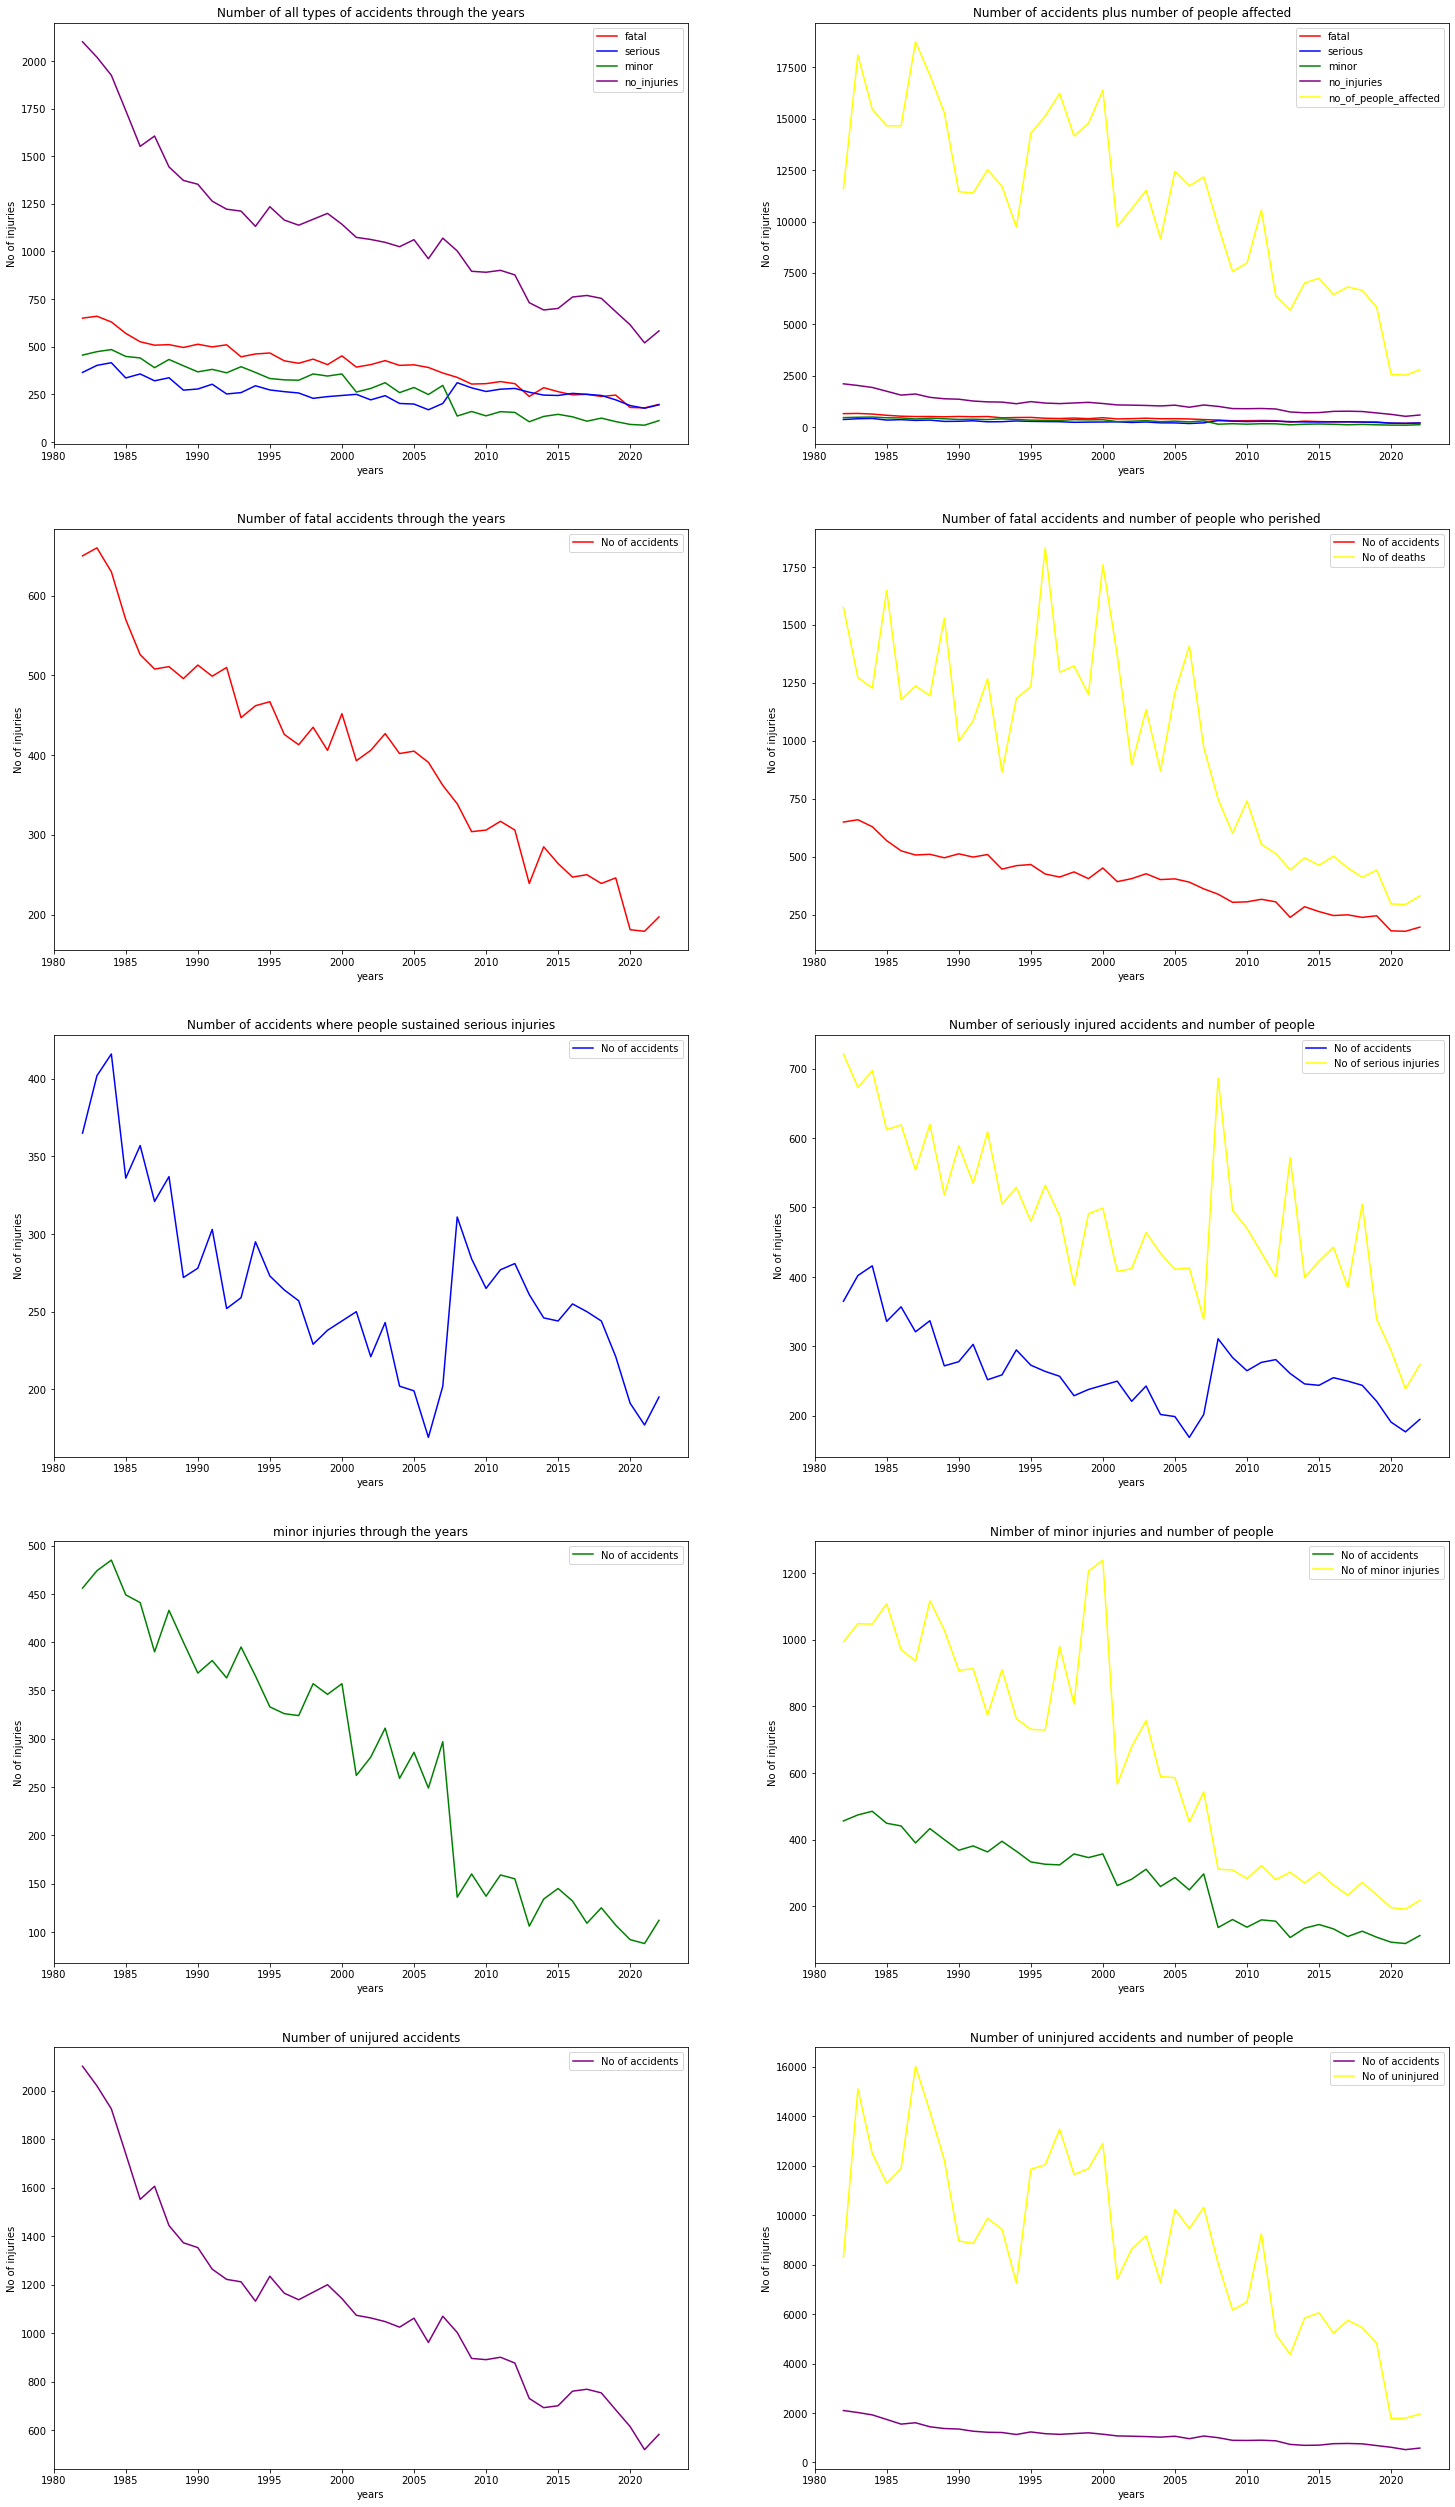

In [78]:
#grouping the type of accident by the year
grouped_by_severity = cleaned_aviation_data_df.groupby(['event_year','injury_severity']).size().unstack()
grouped_by_severity=grouped_by_severity.loc[1982:]

fig,ax=plt.subplots(5,2,figsize=(25,45))


ax[0][0].plot(grouped_by_severity.index,grouped_by_severity['fatal'], label='fatal',color='red')
ax[0][0].plot(grouped_by_severity.index,grouped_by_severity['serious'],label='serious',color='blue')
ax[0][0].plot(grouped_by_severity.index,grouped_by_severity['minor'],label='minor',color='green')
ax[0][0].plot(grouped_by_severity.index,grouped_by_severity['no_injuries'],label='no_injuries',color='purple')
ax[0][0].set_title("Number of all types of accidents through the years")
ax[0][0].set_xlabel("years")
ax[0][0].set_ylabel("No of injuries")
ax[0][0].legend()

ax[0][1].plot(grouped_by_severity.index,grouped_by_severity['fatal'], label='fatal',color='red')
ax[0][1].plot(grouped_by_severity.index,grouped_by_severity['serious'],label='serious',color='blue')
ax[0][1].plot(grouped_by_severity.index,grouped_by_severity['minor'],label='minor',color='green')
ax[0][1].plot(grouped_by_severity.index,grouped_by_severity['no_injuries'],label='no_injuries',color='purple')
ax[0][1].plot(dist_of_injuries_1.index,dist_of_injuries_1['people_affected'],label='no_of_people_affected',color='yellow')
ax[0][1].set_title("Number of accidents plus number of people affected")
ax[0][1].set_xlabel("years")
ax[0][1].set_ylabel("No of injuries")
ax[0][1].legend()

ax[1][0].plot(grouped_by_severity.index,grouped_by_severity['fatal'],color='red',label="No of accidents")
ax[1][0].set_title("Number of fatal accidents through the years")
ax[1][0].set_xlabel("years")
ax[1][0].set_ylabel("No of injuries")
ax[1][0].legend()

ax[1][1].plot(grouped_by_severity.index,grouped_by_severity['fatal'],color='red',label="No of accidents")
ax[1][1].plot(dist_of_injuries_1.index,dist_of_injuries_1['total_fatal_injuries'],color='yellow',label="No of deaths")
ax[1][1].set_title("Number of fatal accidents and number of people who perished")
ax[1][1].set_xlabel("years")
ax[1][1].set_ylabel("No of injuries")
ax[1][1].legend()

ax[2][0].plot(grouped_by_severity.index,grouped_by_severity['serious'],color='blue',label='No of accidents')
ax[2][0].set_title('Number of accidents where people sustained serious injuries')
ax[2][0].set_xlabel("years")
ax[2][0].set_ylabel("No of injuries")
ax[2][0].legend()

ax[2][1].plot(grouped_by_severity.index,grouped_by_severity['serious'],color='blue',label='No of accidents')
ax[2][1].plot(dist_of_injuries_1.index,dist_of_injuries_1['total_serious_injuries'],color='yellow',label="No of serious injuries")
ax[2][1].set_title('Number of seriously injured accidents and number of people')
ax[2][1].set_xlabel("years")
ax[2][1].set_ylabel("No of injuries")
ax[2][1].legend()

ax[3][0].plot(grouped_by_severity.index,grouped_by_severity['minor'],color='green',label="No of accidents")
ax[3][0].set_title("minor injuries through the years")
ax[3][0].set_xlabel("years")
ax[3][0].set_ylabel("No of injuries")
ax[3][0].legend()

ax[3][1].plot(grouped_by_severity.index,grouped_by_severity['minor'],color='green',label="No of accidents")
ax[3][1].plot(dist_of_injuries_1.index,dist_of_injuries_1['total_minor_injuries'],color='yellow',label="No of minor injuries")
ax[3][1].set_title("Nimber of minor injuries and number of people")
ax[3][1].set_xlabel("years")
ax[3][1].set_ylabel("No of injuries")
ax[3][1].legend()

ax[4][0].plot(grouped_by_severity.index,grouped_by_severity['no_injuries'],color='purple',label="No of accidents")
ax[4][0].set_title("Number of unijured accidents")
ax[4][0].set_xlabel("years")
ax[4][0].set_ylabel("No of injuries")
ax[4][0].legend()

ax[4][1].plot(grouped_by_severity.index,grouped_by_severity['no_injuries'],color='purple',label="No of accidents")
ax[4][1].plot(dist_of_injuries_1.index,dist_of_injuries_1['total_uninjured'],color='yellow',label="No of uninjured")
ax[4][1].set_title("Number of uninjured accidents and number of people")
ax[4][1].set_xlabel("years")
ax[4][1].set_ylabel("No of injuries")
ax[4][1].legend()

plt.show();






## Figure showing top 10 planes with the most number of accidents

In [79]:
# Finding top 10 planes with most no of accidents

Top_10_aeroplanes=dict(cleaned_aviation_data_df['make'].value_counts()[:10])
Top_10_aeroplanes


{'Cessna': 26378,
 'Piper': 14460,
 'Beech': 5186,
 'Bell': 2514,
 'Boeing': 1617,
 'Mooney': 1297,
 'Grumman': 1160,
 'Bellanca': 1041,
 'Robinson': 1020,
 'Hughes': 906}

In [80]:
Top_10_aeroplanes.keys()
plane_colors=['blue','green','black','magenta','red','orange','coral','hotpink','royalblue','sienna']

color_map= {key:plane_colors[i] for i,key in enumerate(Top_10_aeroplanes.keys())}

color_map

{'Cessna': 'blue',
 'Piper': 'green',
 'Beech': 'black',
 'Bell': 'magenta',
 'Boeing': 'red',
 'Mooney': 'orange',
 'Grumman': 'coral',
 'Bellanca': 'hotpink',
 'Robinson': 'royalblue',
 'Hughes': 'sienna'}

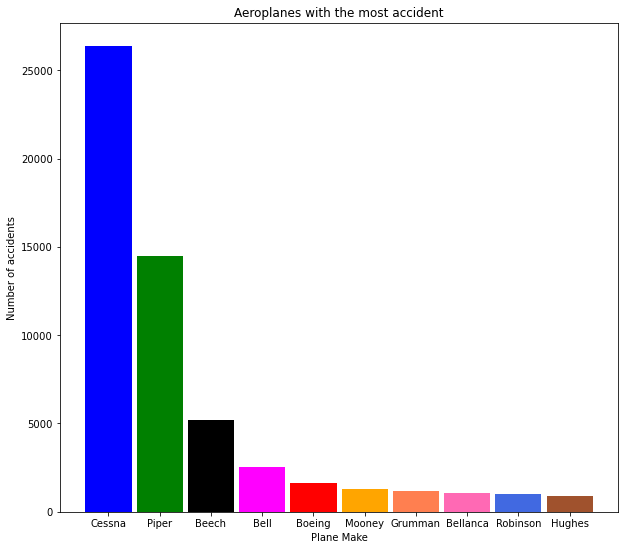

In [81]:
figure,ax=plt.subplots(figsize=(10,9))

ax.bar(Top_10_aeroplanes.keys(),Top_10_aeroplanes.values(),width=0.9,color=plane_colors)
ax.set_title('Aeroplanes with the most accident')
ax.set_ylabel('Number of accidents')
ax.set_xlabel("Plane Make")
plt.show();

## Figure showing the top 3 models from each make involved in the most accidents

In [82]:
#figure showing the top 5 makes and the top 3 models involved in the most accidents
pivot_df_on_make_and_model = pd.pivot_table(cleaned_aviation_data_df,values='event_id',index=['make','model'],aggfunc='count')


In [83]:
pivot_df_on_make_and_model=pivot_df_on_make_and_model.rename(columns={'event_id':'no_of_accidents'})
pivot_df_on_make_and_model

,,no_of_accidents
make,model,
107.5 Flying Corporation,One Design Dr 107,1
1200,G103,1
177Mf Llc,Pitts Model 12,1
1977 Colfer Chan,Steen Skybolt,1
1St Ftr Gp,Focke Wulf 190,1
...,...,...
Zs Delta Bielsko Wroclaw,Szd 36 A Cobra 15,1
Zubair S Khan,Raven,1
Zukowski,Eaa Biplane,1


In [84]:
pivot_df_on_make_and_model.sample(20)

,,no_of_accidents
make,model,
"Murphy Aircraft Mfg, Ltd.",Sr3500 Moose,1
Piper,Pa 31P,31
De Havilland,Dh 8 202,2
Tessier,Avid Flyer,1
Aeronca,Chief 65 Ca,1
Glenn H Curtiss Museum,Hudson Flyer,1
Letecky Zavody,L 23 Super Blanik,1
Raven,Rx 7,8
Kemp,Acro Sport Ii,1


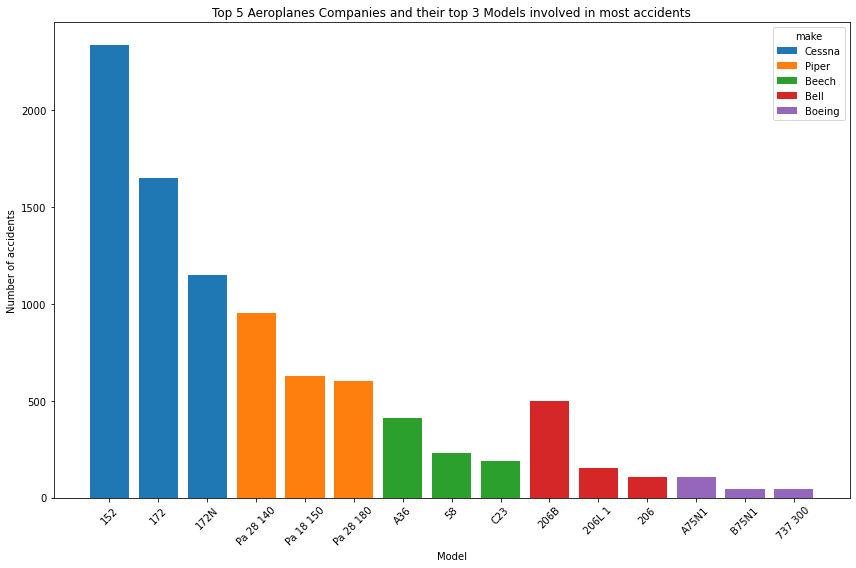

In [85]:

grouped_pivot = pivot_df_on_make_and_model.reset_index()
# creating a groupby that takes the top 5 most makes that are involved in an accident
top_makes=grouped_pivot.groupby('make')['no_of_accidents'].sum().nlargest(5).index
#We then want to filter our dataframe so as to only remain with the top 5 makes of aircrafts
filtered_df=grouped_pivot[grouped_pivot['make'].isin(top_makes)]
#From the filtered dataset we want to get the three top most model from each make involved in the most accidents
top_models=filtered_df.groupby(['make','model'])['no_of_accidents'].sum().groupby(level=0,group_keys=False).nlargest(3).reset_index()

#Having a dataframe that contains our top 5 makes and the top 3 models we can plot the diagram
fig,ax =plt.subplots(figsize=(12,8))
for make in top_makes:
    make_data=top_models[top_models['make']== make]
    ax.bar(make_data['model'],make_data['no_of_accidents'],label=make)

ax.set_title("Top 5 Aeroplanes Companies and their top 3 Models involved in most accidents")
ax.set_xlabel('Model')
ax.set_ylabel('Number of accidents')
ax.legend(title='make')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show();



## Planes make and the distributions of injuries

In [86]:
#lets figure out the make of aeroplanes and the injury distribution among different makes  
pivot_df_on_make_and_accidents = pd.pivot_table(cleaned_aviation_data_df,values=['total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured'],index=['make'],aggfunc='sum')
pivot_df_on_make_and_accidents= pivot_df_on_make_and_accidents.reset_index()



In [87]:
#lets create filters while storing data depending on the number of accident
top_10_makes_by_fatal_accident=pivot_df_on_make_and_accidents.sort_values(by='total_fatal_injuries',ascending=False).head(10)
top_10_makes_by_serious_accident=pivot_df_on_make_and_accidents.sort_values(by='total_serious_injuries',ascending=False).head(10)
top_10_makes_by_minor_accident=pivot_df_on_make_and_accidents.sort_values(by='total_minor_injuries',ascending=False).head(10)
top_10_makes_by_uninjured_accident=pivot_df_on_make_and_accidents.sort_values(by='total_uninjured',ascending=False).head(10)



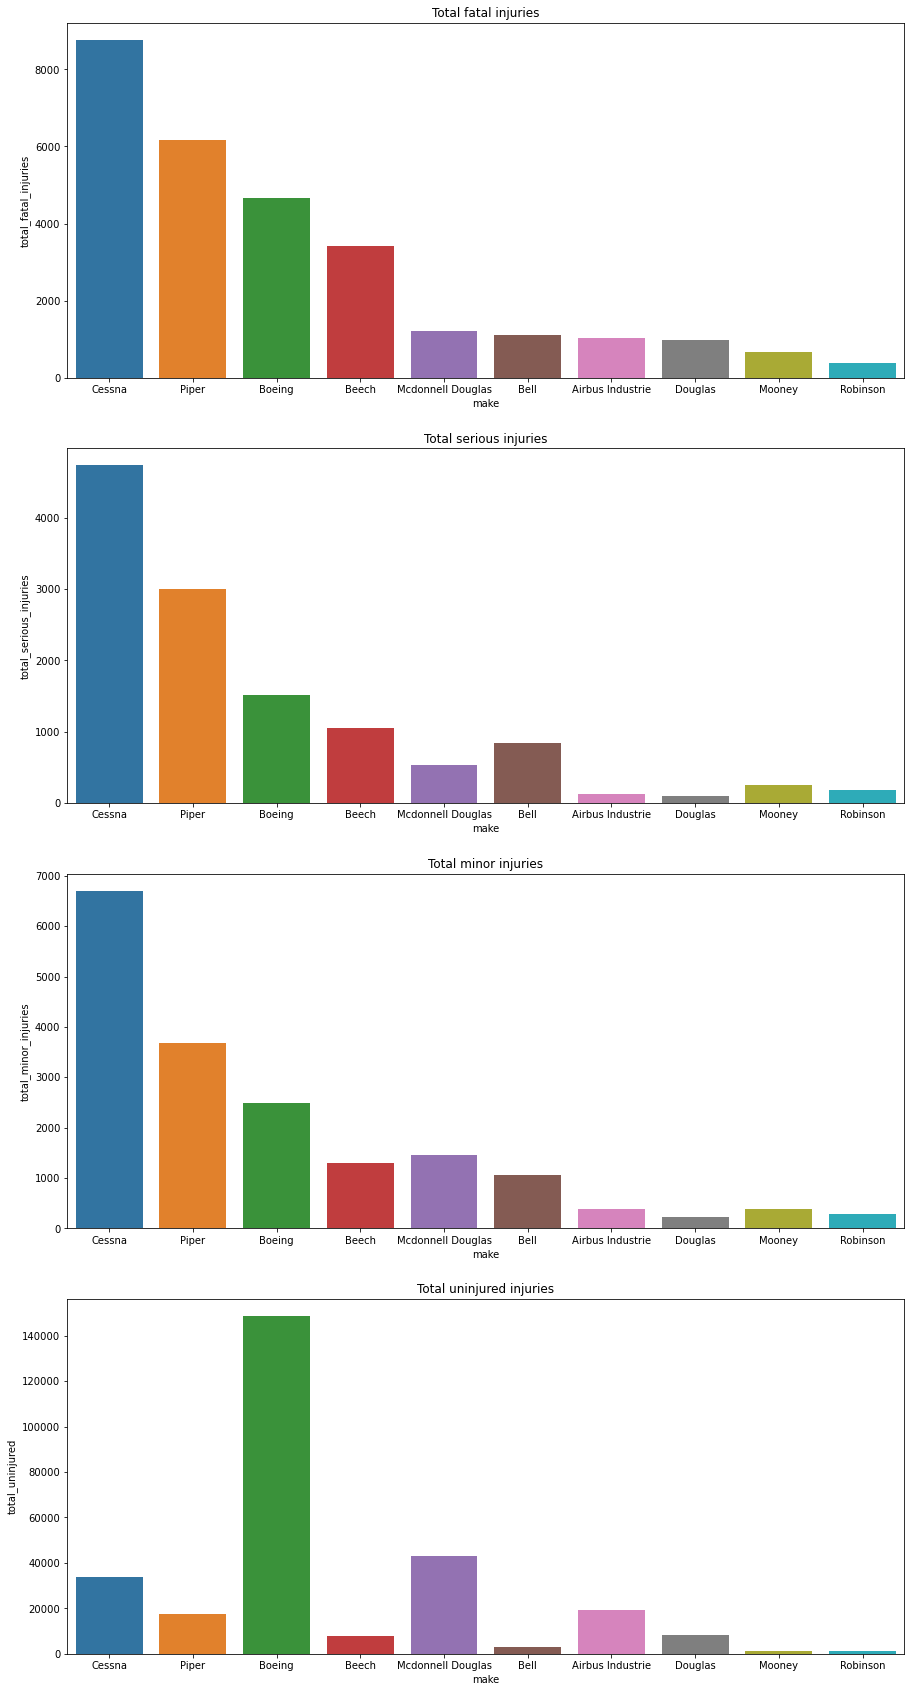

In [88]:
#Lets plot our graphs

fig,ax=plt.subplots(4,1,figsize=(15,30))



sns.barplot(ax=ax[0],x=top_10_makes_by_fatal_accident['make'],y=top_10_makes_by_fatal_accident['total_fatal_injuries'])
ax[0].set_title("Total fatal injuries")

sns.barplot(ax=ax[1],x=top_10_makes_by_fatal_accident['make'],y=top_10_makes_by_fatal_accident['total_serious_injuries'])
ax[1].set_title("Total serious injuries")

sns.barplot(ax=ax[2],x=top_10_makes_by_fatal_accident['make'],y=top_10_makes_by_fatal_accident['total_minor_injuries'])
ax[2].set_title("Total minor injuries")

sns.barplot(ax=ax[3],x=top_10_makes_by_fatal_accident['make'],y=top_10_makes_by_fatal_accident['total_uninjured'])
ax[3].set_title("Total uninjured injuries")

plt.show();



## Weather effects on the accident


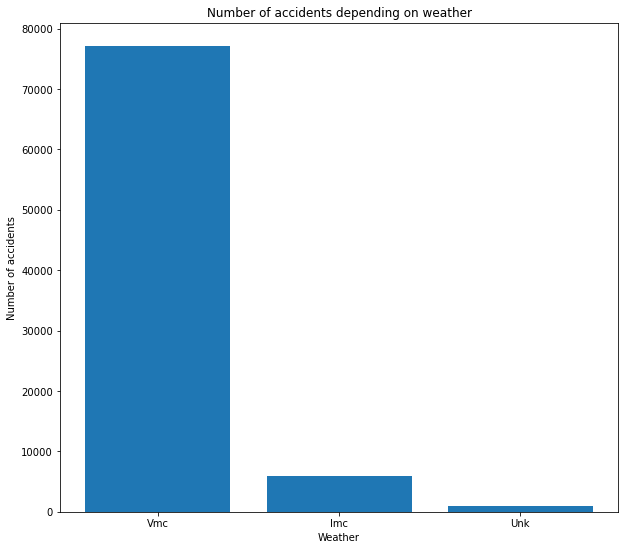

In [89]:
weather=dict(cleaned_aviation_data_df['weather_condition'].value_counts())

figure,ax=plt.subplots(figsize=(10,9))

ax.bar(weather.keys(),weather.values())
ax.set_title('Number of accidents depending on weather')
ax.set_xlabel("Weather")
ax.set_ylabel("Number of accidents")
plt.show();

## Count of type of engines and weather conditions

In [90]:
cleaned_aviation_data_df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'event_year', 'event_month', 'location', 'country', 'injury_severity',
       'aircraft_damage', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'report_status', 'publication_date'],
      dtype='object')

In [92]:
#we will group our table by weather and then engine type

grouped_by_weather_and_engine=cleaned_aviation_data_df.groupby(['engine_type','weather_condition']).size().unstack()





In [94]:
#the is some missing information from our data so we will want to take the engines that are widely used
#so we will create a new column that takes the culmination value of the engines and then we will filter by that value

grouped_by_weather_and_engine['total']=grouped_by_weather_and_engine['Imc']+grouped_by_weather_and_engine['Unk']+grouped_by_weather_and_engine['Vmc']
#Lets filter our dataframe by engines total that are above 500
grouped_by_weather_and_engine=grouped_by_weather_and_engine[grouped_by_weather_and_engine['total']>500]

In [95]:
#we can drop the column we created
grouped_by_weather_and_engine=grouped_by_weather_and_engine.drop(columns='total')

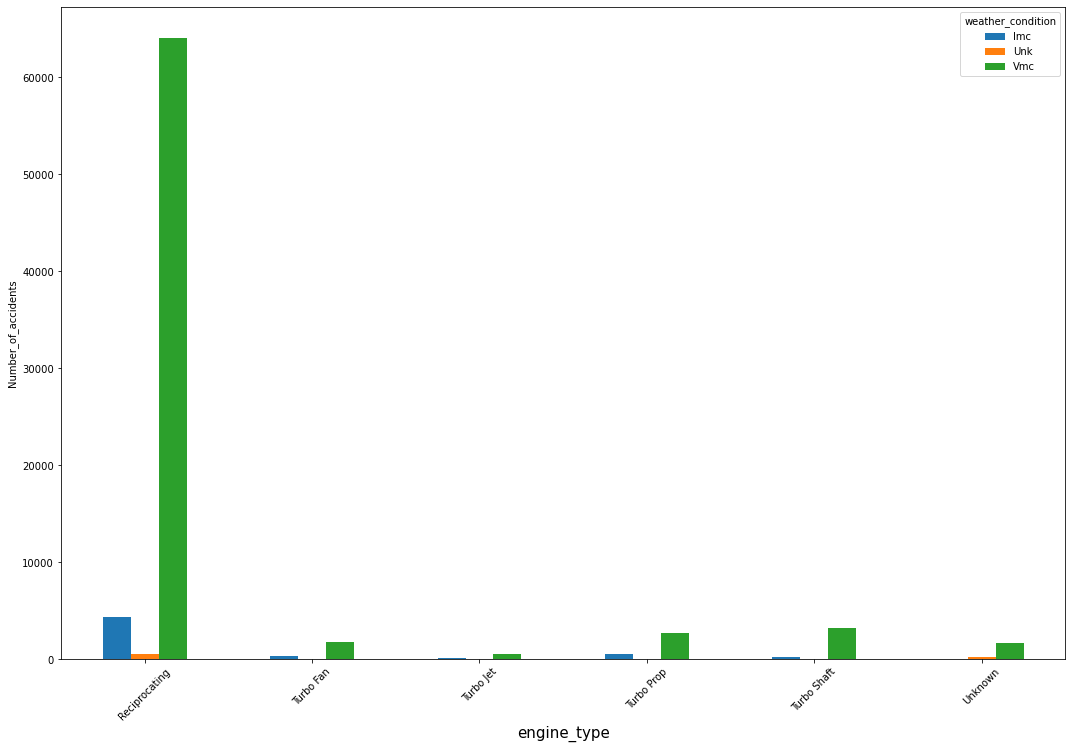

In [96]:

#lets reset our index
# grouped_by_weather_and_engine=grouped_by_weather_and_engine.reset_index()
#Now we can plot our graph

ax=grouped_by_weather_and_engine.plot(kind='bar',figsize=(18,12))
plt.xticks(rotation=45)
ax.set_xlabel('engine_type',fontsize=15)
ax.set_ylabel('Number_of_accidents')

plt.show();

# Exporting our cleaned data to tableau

In [97]:
cleaned_aviation_data_df

,event_id,investigation_type,accident_number,event_date,event_year,event_month,location,country,injury_severity,aircraft_damage,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,Sea87La080,1948-10-24,1948,October,"Moose Creek, Id",United States,fatal,Destroyed,Nc6404,Stinson,108 3,No,1,Reciprocating,Personal,2,0,0,0,Unk,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,Lax94La336,1962-07-19,1962,July,"Bridgeport, Ca",United States,fatal,Destroyed,N5069P,Piper,Pa24 180,No,1,Reciprocating,Personal,4,0,0,0,Unk,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,Nyc07La005,1974-08-30,1974,August,"Saltville, Va",United States,fatal,Destroyed,N5142R,Cessna,172M,No,1,Reciprocating,Personal,3,0,0,0,Imc,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,Lax96La321,1977-06-19,1977,June,"Eureka, Ca",United States,fatal,Destroyed,N1168J,Rockwell,112,No,1,Reciprocating,Personal,2,0,0,0,Imc,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,Chi79Fa064,1979-08-02,1979,August,"Canton, Oh",United States,fatal,Destroyed,N15Ny,Cessna,501,No,<NA>,NaN,Personal,1,2,0,0,Vmc,Approach,Probable Cause,1980-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88859,20221212106443,Accident,Wpr23La064,2022-12-09,2022,December,"Casa Grande, Az",United States,no_injuries,Substantial,190Dk,Arado Flugzeugwerke Gmbh,Fw190 A 5,No,1,NaN,Personal,0,0,0,1,Vmc,NaN,NaN,2022-12-13
88865,20221212106444,Accident,Era23La085,2022-12-12,2022,December,"Knoxville, Tn",United States,no_injuries,Substantial,N783Sf,Cessna,172,No,1,NaN,Instructional,0,0,0,1,Vmc,NaN,NaN,2022-12-15
88873,20221215106463,Accident,Era23La090,2022-12-14,2022,December,"San Juan, Pr",United States,no_injuries,Substantial,N416Pc,Cirrus Design Corp,Sr22,No,1,NaN,Personal,0,0,0,1,Vmc,NaN,NaN,2022-12-27
88877,20221219106470,Accident,Era23La091,2022-12-16,2022,December,"Brooksville, Fl",United States,serious,Substantial,N5405V,Cessna,R172K,No,1,NaN,Personal,0,1,0,0,Vmc,NaN,NaN,2022-12-23


In [98]:
#exporting the cleaned data to tableau
cleaned_aviation_data_df.to_excel("data/cleaned_data",index=False,engine='xlsxwriter')